# Gradient Descent for Linear Regression Explanation

Automating the process of optimizing $w$ and $b$ using gradient descent.

$$ \min_{w, b} J(w, b) $$

| Symbol | |
| --- | --- |
| w | The weight (or slope) of the linear regression model. |
| b | The y intercept or bias of the linear regression model. |
| J(w, b) | The cost function, typically the Mean Squared Error (MSE) |

In [27]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils_common import compute_model_output, plt_gradients
plt.style.use('ggplot')

In [28]:
# Load a simple data set
x_train = np.array([2, 4, 6, 8, 10])   #features
y_train = np.array([1, 3, 5, 7, 9])   #target value

#### Cost Function
The cost function is a measure of how well the model fits the data. For linear regression, we typically use the Mean Squared Error (MSE) as the cost function:
$$ J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2 $$


In [29]:
def compute_cost(x, y, w, b): 
    # number of training examples
    n = x.shape[0] 
    cost_sum = 0 
    for i in range(n): 
        f_mb = w * x[i] + b   
        cost = (f_mb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * n)) * cost_sum  
    return total_cost

#### Compute Gradient Function
The gradient is the vector of partial derivatives of the cost function with respect to each parameter. For linear regression, we have:
$$ \nabla J(w, b) = \begin{bmatrix} \frac{\partial J}{\partial w} \\ \frac{\partial J}{\partial b} \end{bmatrix} $$

A very simple explanation of how the gradient uses derivatives is to compute the gradient, we calculate the cost function with the current parameters and compare them with the cost function with the previous parameters. This gives us a derivative;

1. If the derivative is positive, it means increasing the parameters will increase the cost, so we should decrease the parameters.
2. If the derivative is negative, it means increasing parameters will decrease the cost, so we should increase the parameters.

In [30]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost m.r.t. the parameters w
      dj_db (scalar): The gradient of the cost m.r.t. the parameter b     
     """
    # Number of training examples
    n = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(n):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / n 
    dj_db = dj_db / n 
        
    return dj_dw, dj_db

####  Gradient Descent Function
The gradient descent algorithm updates the parameters in the direction of the negative gradient:
$$ \begin{bmatrix} w \\ b \end{bmatrix} = \begin{bmatrix} w \\ b \end{bmatrix} - \alpha \nabla J(w, b) $$

Where $\alpha$ is the learning rate.

##### Learning Rate
The learning rate is a hyperparameter that controls how much to change the model parameters in response to the estimated gradient. A small learning rate means the model will learn slowly, while a large learning rate can cause the model to converge too quickly to a suboptimal solution or even diverge.

##### Stopping Criteria
The stopping criteria for gradient descent can be based on:
- A maximum number of iterations
- A threshold for the change in the cost function
- A threshold for the change in the parameters
- A threshold for the gradient

##### Goal
The optimal parameters $w$ and $b$ that minimize the cost function $J(w, b)$ are found when convergence is reached because the partial derivative for both $w$ and $b$ are 0 before the 'stopping criteria'.

In [31]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    # An array to store cost J and m's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    data = pd.DataFrame(
      {
        "Iteration": ["Initial"],
        "Cost": [f"{cost_function(x, y, w , b):.8f}"],
        "w part deriv": [""],
        "b part deriv": [""],
        "w": [w_in],
        "b": [b_in],
      },
      )
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:       
            new_row = pd.DataFrame(
            {
              "Iteration": [i],
              "Cost": [f"{J_history[-1]:.8f}"],
              "w part deriv": [f"{dj_dw:.8f}"],
              "b part deriv": [f"{dj_db:.8f}"],
              "w": [w],
              "b": [b],
            },
            )
            data = pd.concat([data, new_row])
    new_row = pd.DataFrame(
      {
        "Iteration": ["Final"],
        "Cost": [f"{J_history[-1]:.8f}"],
        "w part deriv": [f"{dj_dw:.8f}"],
        "b part deriv": [f"{dj_db:.8f}"],
        "w": [w],
        "b": [b],
      },
      )
    data = pd.concat([data, new_row])
    return w, b, J_history, p_history, data #return wb and J,w history for graphing

#### Set Gradient Descent Parameters

In [33]:
w_init = 0  #Starting m parameter
b_init = 0  #Starting b parameter
iterations = 10000  #Stopping criteria
tmp_alpha = 0.010   #Learn rate

#### Run Gradient Descent And Analyze The Results

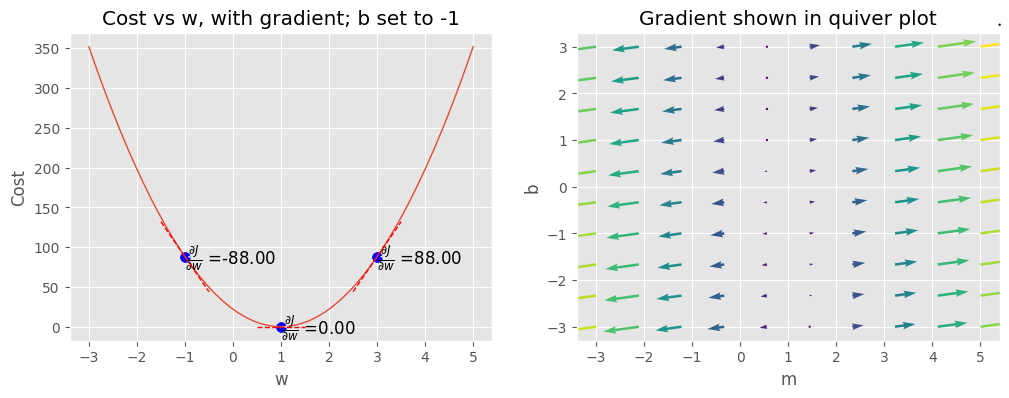

In [35]:
#Visualise Gradient Descent
#Quiver plot, indicate magnitude and direction of Gradient
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [36]:
#Analyse gradient descent at various stages
w_final, b_final, J_hist, p_hist, data = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient) 
print(data)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

  Iteration         Cost  w part deriv b part deriv         w         b
0   Initial  16.50000000                             0.000000  0.000000
0         0   5.10205000  -38.00000000  -5.00000000  0.380000  0.050000
0      1000   0.00316754   -0.00456967   0.03337494  0.974443 -0.813344
0      2000   0.00008893   -0.00076566   0.00559209  0.995718 -0.968725
0      3000   0.00000250   -0.00012829   0.00093698  0.999283 -0.994760
0      4000   0.00000007   -0.00002150   0.00015699  0.999880 -0.999122
0      5000   0.00000000   -0.00000360   0.00002630  0.999980 -0.999853
0      6000   0.00000000   -0.00000060   0.00000441  0.999997 -0.999975
0      7000   0.00000000   -0.00000010   0.00000074  0.999999 -0.999996
0      8000   0.00000000   -0.00000002   0.00000012  1.000000 -0.999999
0      9000   0.00000000   -0.00000000   0.00000002  1.000000 -1.000000
0     Final   0.00000000   -0.00000000   0.00000000  1.000000 -1.000000
(w,b) found by gradient descent: (  1.0000, -1.0000)


#### Plot The Optimal Parameters Discovered By Gradient Descent

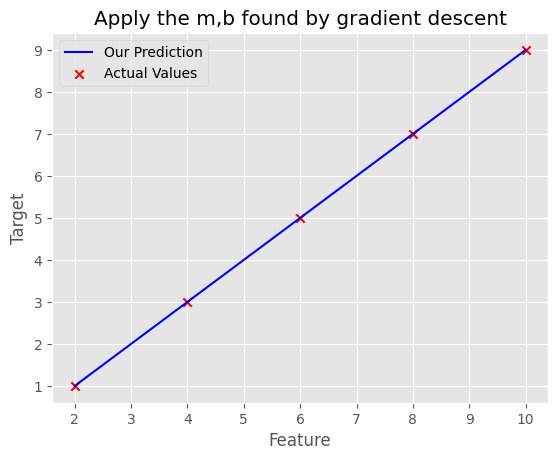

In [37]:
tmp_f_wb = compute_model_output(x_train, w_final, b_final)

# Plot
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title('Apply the m,b found by gradient descent')
plt.ylabel('Target')
plt.xlabel('Feature')
plt.legend()
plt.show()